In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
# 정답 저장!
y = train['Survived']

## 데이터 전처리

In [4]:
# 트레이닝, 테스트 데이터 >>성별<< 이진화, female = 1, female = 0
embarked_mapping = {'female': 1, 'male': 0}
train['Sex'] = train['Sex'].map(embarked_mapping)
test['Sex'] = test['Sex'].map(embarked_mapping)

# embarked null값 그냥 S로 채운 후 S, C, Q값 숫자로 바꿔주기
train = train.fillna({"Embarked": "S"})
test = test.fillna({"Embarked": "S"})
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

# 이름 길이(Name_length) 추가하기
train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)

# fare 매핑
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
train['Fare'] = np.where(train['Fare'] <= 7.91, 0, train['Fare'])
train['Fare'] = np.where((train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 1, train['Fare'])
train['Fare'] = np.where((train['Fare'] > 14.454) & (train['Fare'] <= 31), 2, train['Fare'])
train['Fare'] = np.where(train['Fare'] > 31, 3, train['Fare'])
train['Fare'] = train['Fare'].astype(int)
test['Fare'] = np.where(test['Fare'] <= 7.91, 0, test['Fare'])
test['Fare'] = np.where((test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 1, test['Fare'])
test['Fare'] = np.where((test['Fare'] > 14.454) & (test['Fare'] <= 31), 2, test['Fare'])
test['Fare'] = np.where(test['Fare'] > 31, 3, test['Fare'])
test['Fare'] = test['Fare'].astype(int)

#age 매핑
age_avg = train['Age'].mean()
train['Age'] = train['Age'].fillna(age_avg)
test['Age'] = test['Age'].fillna(age_avg)
test['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)
train['Age'] = np.where(train['Age'] <= 16, 0, train['Age'])
train['Age'] = np.where((train['Age'] > 16) & (train['Age'] <= 32), 1, train['Age'])
train['Age'] = np.where((train['Age'] > 32) & (train['Age'] <= 48), 2, train['Age'])
train['Age'] = np.where((train['Age'] > 48) & (train['Age'] <= 64), 3, train['Age'])
train['Age'] = np.where(train['Age'] > 64, 4, train['Age'])
test['Age'] = np.where(test['Age'] <= 16, 0, test['Age'])
test['Age'] = np.where((test['Age'] > 16) & (test['Age'] <= 32), 1, test['Age'])
test['Age'] = np.where((test['Age'] > 32) & (test['Age'] <= 48), 2, test['Age'])
test['Age'] = np.where((test['Age'] > 48) & (test['Age'] <= 64), 3, test['Age'])
test['Age'] = np.where(test['Age'] > 64, 4, test['Age'])
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

# 없앨 feature들,,
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)


In [5]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length
0,1,0,3,0,1,1,0,0,1,23
1,2,1,1,1,2,1,0,3,2,51
2,3,1,3,1,1,0,0,1,1,22
3,4,1,1,1,2,1,0,3,1,44
4,5,0,3,0,2,0,0,1,1,24
5,6,0,3,0,1,0,0,1,3,16
6,7,0,1,0,3,0,0,3,1,23
7,8,0,3,0,0,3,1,2,1,30
8,9,1,3,1,1,0,2,1,1,49
9,10,1,2,1,0,1,0,2,2,35


In [6]:
# w, x값 받아서 방정식값 출력
def lin_val(x_arr):
    temparr = []
    for x in x_arr:
        temparr.append([x])
    linalg = np.asmatrix([w_arr]) * np.asmatrix(temparr)
    result = linalg.A
    return result[0][0]

# 일단 w0, w1, w2, w3만 사용, 더쓸거면 추가!!
## sex, age, fare

In [7]:
w_arr = []    # w값들을 배열에 저장해서 사용할 겁니다.
# 일단은 w 두개!
w_arr=[random.random(), random.random()]

x_arr = []
for i in range(train.shape[0]):
    x_arr.append([0, train['Sex'][i]])

In [8]:
w_arr

[0.9932030253130791, 0.855399645349603]

In [9]:
# sigmoid func
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# predicting func
def pred_probability(x_arr):
    z = lin_val(x_arr)
    return sigmoid(z)
# loss func
def cost_func():
    sum = 0
    for i in range(train.shape[0]):
        probability = pred_probability(x_arr[i])
        sum += y[i] * np.log(probability) + (1 - y[i]) * np.log(1 - probability)
    total_cost = -(1/train.shape[0]) * sum
    return total_cost       

# x값 추가되면 바꿔줘야함...

In [10]:
predicted_right = 0
for index, row in train.iterrows():
    probability = pred_probability([0, row['Sex']])
    if (probability > 0.5):
        if (y[index] == 1):
            predicted_right += 1
    else:
        if (y[index] == 0):
            predicted_right += 1
print("train_accuracy:", (predicted_right/train.shape[0])*100, "%")

train_accuracy: 78.67564534231201 %


In [20]:
# cost 함수 미분한것, w_num번째 w값에 대해 미분?
def gradient_derivate(w_num):
    sum = 0
    for i in range(train.shape[0]):
        probability = pred_probability(x_arr[i])
        if (w_num == 0):
            sum += (probability - y[i])
        else:
            sum += (probability - y[i]) * x_arr[i][w_num]
    return (1/train.shape[0]) * sum

w_zero_graph = []
w_one_graph = []
# w_two_graph = []
# w_three_graph = []
w_cost = []

import time
# iteration만큼 반복
def converge(iteration):
    alpha = 0.0001
    start_time = time.time()
    for i in range(iteration):
        temp_arr = w_arr[:]
        for j in range(len(w_arr)):
            w_arr[j] = w_arr[j] - alpha * gradient_derivate(j)
#             print(j, "번째 w?", w_arr[j], "||", "원래:", temp_arr[j])
            if (j == 0):
                w_zero_graph.append(w_arr[j])
            elif (j == 1):
                w_one_graph.append(w_arr[j])
#             elif (j == 2):
#                 w_two_graph.append(w_arr[j])
#             elif (j == 3):
#                 w_three_graph.append(w_arr[j])
            if (w_arr[j] > 1 or w_arr[j] < -1):
                break
            
        if (i % 100 == 0):
            print(i, "번째 학습,,,")
            w_cost.append(cost_func())
            if (w_cost[-1] < 0.1):
                break
#         print("cost:", w_cost[i])
#         print("-----------------------------------------------------------")
    print("WorkingTime: %s sec" %(time.time() - start_time))
    plt.plot(w_zero_graph, label='w0')
    plt.plot(w_one_graph, label='w1')
#     plt.plot(w_two_graph, label='w2')
#     plt.plot(w_three_graph, label='w3')
    plt.legend()
    plt.show()
    plt.plot(w_cost, label="cost")
    plt.legend()
    plt.show()

0 번째 학습,,,
100 번째 학습,,,
200 번째 학습,,,
300 번째 학습,,,
400 번째 학습,,,
500 번째 학습,,,
600 번째 학습,,,
700 번째 학습,,,
800 번째 학습,,,
900 번째 학습,,,
1000 번째 학습,,,
1100 번째 학습,,,
1200 번째 학습,,,
1300 번째 학습,,,
1400 번째 학습,,,
1500 번째 학습,,,
1600 번째 학습,,,
1700 번째 학습,,,
1800 번째 학습,,,
1900 번째 학습,,,
2000 번째 학습,,,
2100 번째 학습,,,
2200 번째 학습,,,
2300 번째 학습,,,
2400 번째 학습,,,
2500 번째 학습,,,
2600 번째 학습,,,
2700 번째 학습,,,
2800 번째 학습,,,
2900 번째 학습,,,
3000 번째 학습,,,
3100 번째 학습,,,
3200 번째 학습,,,
3300 번째 학습,,,
3400 번째 학습,,,
3500 번째 학습,,,
3600 번째 학습,,,
3700 번째 학습,,,
3800 번째 학습,,,
3900 번째 학습,,,
4000 번째 학습,,,
4100 번째 학습,,,
4200 번째 학습,,,
4300 번째 학습,,,
4400 번째 학습,,,
4500 번째 학습,,,
4600 번째 학습,,,
4700 번째 학습,,,
4800 번째 학습,,,
4900 번째 학습,,,
5000 번째 학습,,,
5100 번째 학습,,,
5200 번째 학습,,,
5300 번째 학습,,,
5400 번째 학습,,,
5500 번째 학습,,,
5600 번째 학습,,,
5700 번째 학습,,,
5800 번째 학습,,,
5900 번째 학습,,,
6000 번째 학습,,,
6100 번째 학습,,,
6200 번째 학습,,,
6300 번째 학습,,,
6400 번째 학습,,,
6500 번째 학습,,,
6600 번째 학습,,,
6700 번째 학습,,,
6800 번째 학습,,,
6900 번째 학습,,,
7000 번째 학습,,,
7100 번째 학습,,,
7200

55400 번째 학습,,,
55500 번째 학습,,,
55600 번째 학습,,,
55700 번째 학습,,,
55800 번째 학습,,,
55900 번째 학습,,,
56000 번째 학습,,,
56100 번째 학습,,,
56200 번째 학습,,,
56300 번째 학습,,,
56400 번째 학습,,,
56500 번째 학습,,,
56600 번째 학습,,,
56700 번째 학습,,,
56800 번째 학습,,,
56900 번째 학습,,,
57000 번째 학습,,,
57100 번째 학습,,,
57200 번째 학습,,,
57300 번째 학습,,,
57400 번째 학습,,,
57500 번째 학습,,,
57600 번째 학습,,,
57700 번째 학습,,,
57800 번째 학습,,,
57900 번째 학습,,,
58000 번째 학습,,,
58100 번째 학습,,,
58200 번째 학습,,,
58300 번째 학습,,,
58400 번째 학습,,,
58500 번째 학습,,,
58600 번째 학습,,,
58700 번째 학습,,,
58800 번째 학습,,,
58900 번째 학습,,,
59000 번째 학습,,,
59100 번째 학습,,,
59200 번째 학습,,,
59300 번째 학습,,,
59400 번째 학습,,,
59500 번째 학습,,,
59600 번째 학습,,,
59700 번째 학습,,,
59800 번째 학습,,,
59900 번째 학습,,,
60000 번째 학습,,,
60100 번째 학습,,,
60200 번째 학습,,,
60300 번째 학습,,,
60400 번째 학습,,,
60500 번째 학습,,,
60600 번째 학습,,,
60700 번째 학습,,,
60800 번째 학습,,,
60900 번째 학습,,,
61000 번째 학습,,,
61100 번째 학습,,,
61200 번째 학습,,,
61300 번째 학습,,,
61400 번째 학습,,,
61500 번째 학습,,,
61600 번째 학습,,,
61700 번째 학습,,,
61800 번째 학습,,,
61900 번째 학습,,,
62000 번째 학

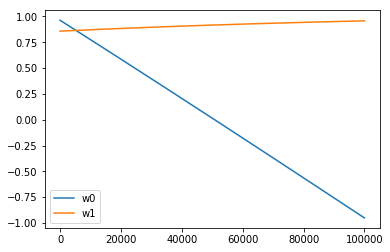

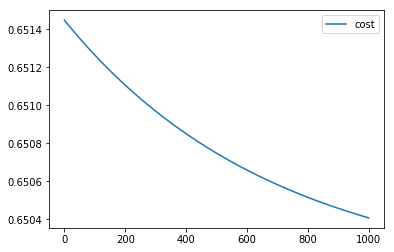

train_accuracy: 78.67564534231201 %


In [21]:
converge(100001)
predicted_right = 0
for index, row in train.iterrows():
    probability = pred_probability([0, row['Sex']])
    if (probability > 0.5):
        if (y[index] == 1):
            predicted_right += 1
    else:
        if (y[index] == 0):
            predicted_right += 1
print("train_accuracy:", (predicted_right/train.shape[0])*100, "%")

In [35]:
test_index = 892
submission = pd.DataFrame({"PassengerId": [], "Survived": [] })
for index, row in test.iterrows():
    probability = pred_probability([0, row['Sex']])
    if (probability > 0.5):
        submission.loc[test_index] = [test_index, 1]
    else:
        submission.loc[test_index] = [test_index, 0]
    test_index += 1
submission['PassengerId'] = submission['PassengerId'].astype(int)
submission['Survived'] = submission['Survived'].astype(int)

In [33]:
submission.to_csv("my_first_submission.csv", index=False)